### Problem Statement

#### Introduction
Solving this assignment will give you an idea about how real business problems are solved using EDA. In this case study, apart from applying the techniques you have learnt in EDA, you will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

  

##### Business Understanding
You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

In this case study, we will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.


### Importing the Libraries

In [1]:
#Importing libraries Pandas, Numpy ,Random Matplotlib and Seaborn and Ignoring Warnings
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import random
warnings.filterwarnings('ignore')
pd.set_option("max_rows", None)
pd.set_option('display.max_columns', 500)

### Reading the Datasets
###### Placing  jupyter notebook code files on the same folder as as loan.csv dataset

In [2]:
loanDF = pd.read_csv("loan.csv")
#Checking the structure of loan dataset
loanDF.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


### Checkpoint : Data Cleaning
###### Understanding the Data Set 

In [3]:
#Count of rows and columns
loanDF.shape

(39717, 111)

In [4]:
loanDF.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [5]:
#Datatype of columns
loanDF.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
id                                int64
member_id                         int64
loan_amnt                         int64
funded_amnt                       int64
funded_amnt_inv                   float64
term                              object
int_rate                          object
installment                       float64
grade                             object
sub_grade                         object
emp_title                         object
emp_length                        object
home_ownership                    object
annual_inc                        float64
verification_status               object
issue_d                           object
loan_status                       object
pymnt_plan                        object
url                               object
desc                              object
purpose                           object
title                         

In [6]:
#Finding null count columns wise
loanDF.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [7]:
#Finding percentage of null rows column wise..
null_count=round(100*(loanDF.isnull().sum()/len(loanDF.index)),2)
null_count

id                                  0.00
member_id                           0.00
loan_amnt                           0.00
funded_amnt                         0.00
funded_amnt_inv                     0.00
term                                0.00
int_rate                            0.00
installment                         0.00
grade                               0.00
sub_grade                           0.00
emp_title                           6.19
emp_length                          2.71
home_ownership                      0.00
annual_inc                          0.00
verification_status                 0.00
issue_d                             0.00
loan_status                         0.00
pymnt_plan                          0.00
url                                 0.00
desc                               32.58
purpose                             0.00
title                               0.03
zip_code                            0.00
addr_state                          0.00
dti             

In [8]:
#segregate null columns above 50% of the rows and get count..
null_count=null_count[null_count>=50]
len(null_count)

57

In [9]:
#Drop columns.. with null above 50% of the rows
cols_dropped=([null_count[null_count >=50.00].index])
loanDF.drop(labels=cols_dropped[0],axis=1,inplace=True)

In [10]:
#Checking shape after Droping columns with above 50% of the null rows
loanDF.shape

(39717, 54)

In [11]:
#Extracting Year from issue_d column
loanDF['Year'] = loanDF['issue_d'].apply(lambda x : int("20"+x.split('-')[1]))

In [12]:
#Again Finding percentage of null rows column wise..
round(100*(loanDF.isnull().sum()/len(loanDF.index)),2)

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.58
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

In [13]:
#Dropping columns based on Customer Behavior Variable as it doent have any impact on analysis done by Lending Club
loanDF.drop(labels=['emp_title','desc','title','last_pymnt_d','collections_12_mths_ex_med','chargeoff_within_12_mths','tax_liens','last_credit_pull_d','delinq_2yrs','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_amnt','application_type' ],axis=1,inplace=True)

In [14]:
# Percenatge of NAN rows, column wise
100*(loanDF.isnull().sum()/len(loanDF.index))

id                      0.000000
member_id               0.000000
loan_amnt               0.000000
funded_amnt             0.000000
funded_amnt_inv         0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_length              2.706650
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
pymnt_plan              0.000000
url                     0.000000
purpose                 0.000000
zip_code                0.000000
addr_state              0.000000
dti                     0.000000
earliest_cr_line        0.000000
initial_list_status     0.000000
policy_code             0.000000
acc_now_delinq          0.000000
delinq_amnt             0.000000
pub_rec_bankruptcies    1.754916
Year                    0.000000
dtype: float64

In [15]:
#Removing rows with null pub_rec_bankruptcies (Number of public record bankruptcies)
loanDF = loanDF[loanDF['pub_rec_bankruptcies'].notna()]

In [16]:
#Removing alplabets from emp_length column Eg. 10+ years => 10
loanDF.emp_length = loanDF.emp_length.str.extract('(\d+)')

In [17]:
#loanDF.emp_length.median()
int(loanDF.emp_length.median())

4

In [18]:
#Anysing the spread across each work experience..
loanDF.emp_length.value_counts()

10    8760
1     7564
2     4304
3     4034
4     3391
5     3249
6     2197
7     1751
8     1454
9     1241
Name: emp_length, dtype: int64

In [19]:
#Imputing NANs with median in emp_length coulmn
loanDF['emp_length'].fillna((str(int(loanDF.emp_length.median()))), inplace=True)

In [22]:
# Percenatge of NAN rows, column wise
100*(loanDF.isnull().sum()/len(loanDF.index))

id                      0.0
member_id               0.0
loan_amnt               0.0
funded_amnt             0.0
funded_amnt_inv         0.0
term                    0.0
int_rate                0.0
installment             0.0
grade                   0.0
sub_grade               0.0
emp_length              0.0
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
issue_d                 0.0
loan_status             0.0
pymnt_plan              0.0
url                     0.0
purpose                 0.0
zip_code                0.0
addr_state              0.0
dti                     0.0
earliest_cr_line        0.0
initial_list_status     0.0
policy_code             0.0
acc_now_delinq          0.0
delinq_amnt             0.0
pub_rec_bankruptcies    0.0
Year                    0.0
dtype: float64

In [23]:
#Remove % from interest rate to make numerical(float) column
loanDF['int_rate'] = loanDF['int_rate'].str.rstrip('%').astype(np.float)

In [24]:
#Analysing the loan dataset
loanDF.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,zip_code,addr_state,dti,earliest_cr_line,initial_list_status,policy_code,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies,Year
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,860xx,AZ,27.65,Jan-85,f,1,0,0,0.0,2011
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,1,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,309xx,GA,1.00,Apr-99,f,1,0,0,0.0,2011


In [25]:
#Checking the distribution of Loan Status
loanDF.loan_status.value_counts()

Fully Paid     32371
Charged Off     5509
Current         1140
Name: loan_status, dtype: int64

In [26]:
#Removing rows with Current on going lending cases as they will not play a role in judging if this as paid or not..
loanDF = loanDF[loanDF.loan_status != 'Current']

In [27]:
#Number of unique values in the columns
loanDF.nunique().sort_values()

delinq_amnt                 1
acc_now_delinq              1
policy_code                 1
initial_list_status         1
pymnt_plan                  1
term                        2
loan_status                 2
verification_status         3
pub_rec_bankruptcies        3
home_ownership              4
Year                        5
grade                       7
emp_length                 10
purpose                    14
sub_grade                  35
addr_state                 49
issue_d                    52
int_rate                  336
earliest_cr_line          524
zip_code                  809
loan_amnt                 860
funded_amnt              1013
dti                      2853
annual_inc               5152
funded_amnt_inv          7714
installment             14629
url                     37880
member_id               37880
id                      37880
dtype: int64

In [28]:
#Distribution on annual income of applicants, (outliers if any)
round(loanDF.annual_inc.describe(),2)

count      37880.00
mean       68763.87
std        63573.79
min         4000.00
25%        40000.00
50%        59000.00
75%        82000.00
max      6000000.00
Name: annual_inc, dtype: float64

In [29]:
#Binning the annual income into 3 bins..
bins = [0,40000,82000,6000000]
slots = ['Low','Medium','High']
loanDF['annual_inc_range']=pd.cut(loanDF['annual_inc'],bins=bins,labels=slots)

In [30]:
#Distribution on installment of applicants
loanDF.installment.describe()

count    37880.000000
mean       322.469358
std        208.620127
min         16.080000
25%        165.820000
50%        277.760000
75%        425.550000
max       1305.190000
Name: installment, dtype: float64

In [31]:
#Binning the installment into 3 bins..
bins = [0,167.132500,430.780000,1305.19]
slots = ['Low','Medium','High']
loanDF['installment_range']=pd.cut(loanDF['installment'],bins=bins,labels=slots)

In [32]:
#Distribution on loan amount of applicants
loanDF.loan_amnt.describe()

count    37880.000000
mean     11067.092793
std       7364.014949
min        500.000000
25%       5375.000000
50%       9637.500000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [33]:
#Binning the loan amount into 3 bins..
bins = [0,5500,15000,35000]
slots = ['Low','Medium','High']
loanDF['loan_amnt_range']=pd.cut(loanDF['loan_amnt'],bins=bins,labels=slots)

In [34]:
#Distribution on debt to income ration-dti of applicants
loanDF.dti.describe()

count    37880.000000
mean        13.317518
std          6.664633
min          0.000000
25%          8.190000
50%         13.410000
75%         18.590000
max         29.990000
Name: dti, dtype: float64

In [35]:
#Binning the dti into 3 bins..
bins = [0,10,20,30]
slots = ['Low','Medium','High']
loanDF['DTI_range']=pd.cut(loanDF['dti'],bins=bins,labels=slots)

### Checkpoint
#### Univariate Analysis on Loan Dataset

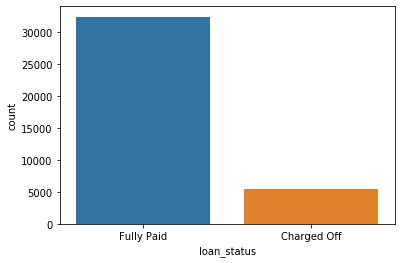

In [36]:
#Analysing the loan status distribution
sns.countplot(loanDF.loan_status)
plt.show()

In [37]:
100*(loanDF.loan_status.value_counts()/len(loanDF.index))

Fully Paid     85.456705
Charged Off    14.543295
Name: loan_status, dtype: float64

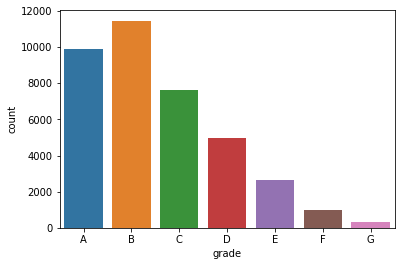

In [38]:
#Plotting the grade bar plot(count)
sns.countplot(loanDF.sort_values(by=['grade']).grade)
plt.show()

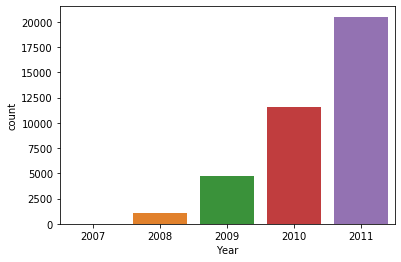

In [39]:
#Plotting the year wise loan taken plot 
sns.countplot(loanDF.Year)
plt.show()

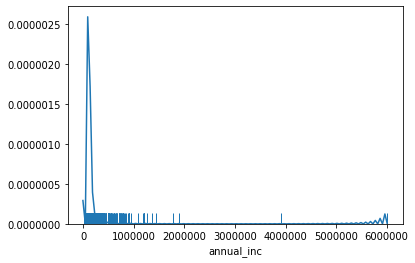

In [40]:
#Analysing the distribution of annual income of applicants
sns.distplot(loanDF.annual_inc,rug=True,hist=False)
plt.show()

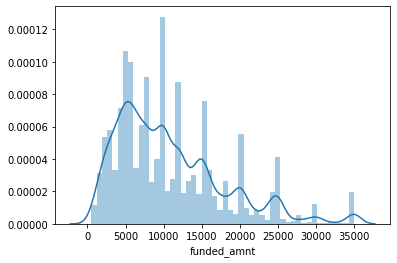

In [41]:
#Distribution of funded amount
sns.distplot(loanDF.funded_amnt)
plt.show()

In [42]:
loanDF.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,zip_code,addr_state,dti,earliest_cr_line,initial_list_status,policy_code,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies,Year,annual_inc_range,installment_range,loan_amnt_range,DTI_range
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,860xx,AZ,27.65,Jan-85,f,1,0,0,0.0,2011,Low,Low,Low,High
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,1,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,309xx,GA,1.00,Apr-99,f,1,0,0,0.0,2011,Low,Low,Low,Low


###### Observations : 
1.Arround 14.5% of people defaulted out of total people who applied loan.

2.Majority people have Grades A & B who are taking loans.

3.Loan granted has increasing trend Year on Year basis.

4.Mostly loan applicants lie between 50k income bracket.

5.Applied loan amount for peaks arround 5k and sees a downward trend henceforth.

### Checkpoint
### Bivariate Analysis on Loan Dataset


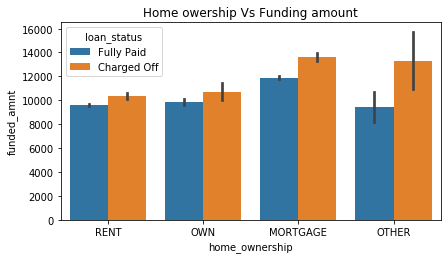

In [43]:
#Home owership Vs Funding amount Plot
plt.figure(figsize = (15, 8))
plt.subplot(2, 2, 1)
plt.title('Home owership Vs Funding amount')
sns.barplot(data=loanDF, x="home_ownership", y="funded_amnt", hue="loan_status")

<Figure size 1080x576 with 0 Axes>

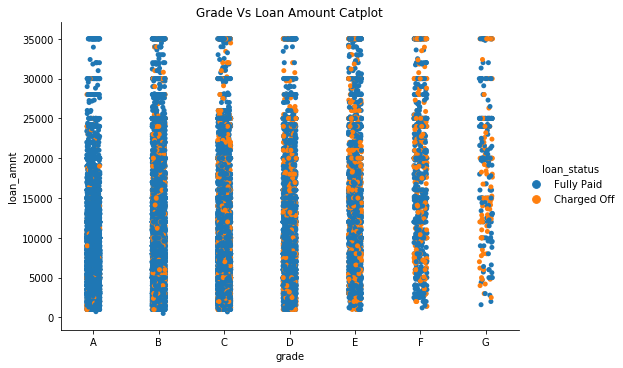

In [44]:
#Grade Vs Loan Amount Catplot
plt.figure(figsize = (15, 8))
sns.catplot(x="grade", y="loan_amnt",hue="loan_status",aspect=1.5, jitter=True, data=loanDF.sort_values(by=['grade']))
plt.title('Grade Vs Loan Amount Catplot')
plt.show()

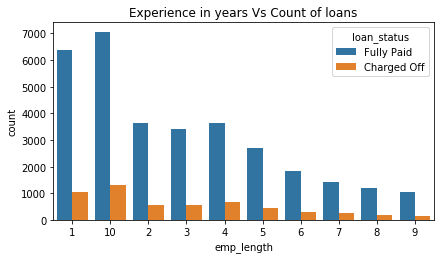

In [45]:
#Plot Experience in years Vs Count of loans
plt.figure(figsize = (15, 8))
plt.subplot(2, 2, 1)
plt.title('Experience in years Vs Count of loans')
sns.countplot(x="emp_length", hue="loan_status", data=loanDF.sort_values(by=['emp_length']))
plt.show()

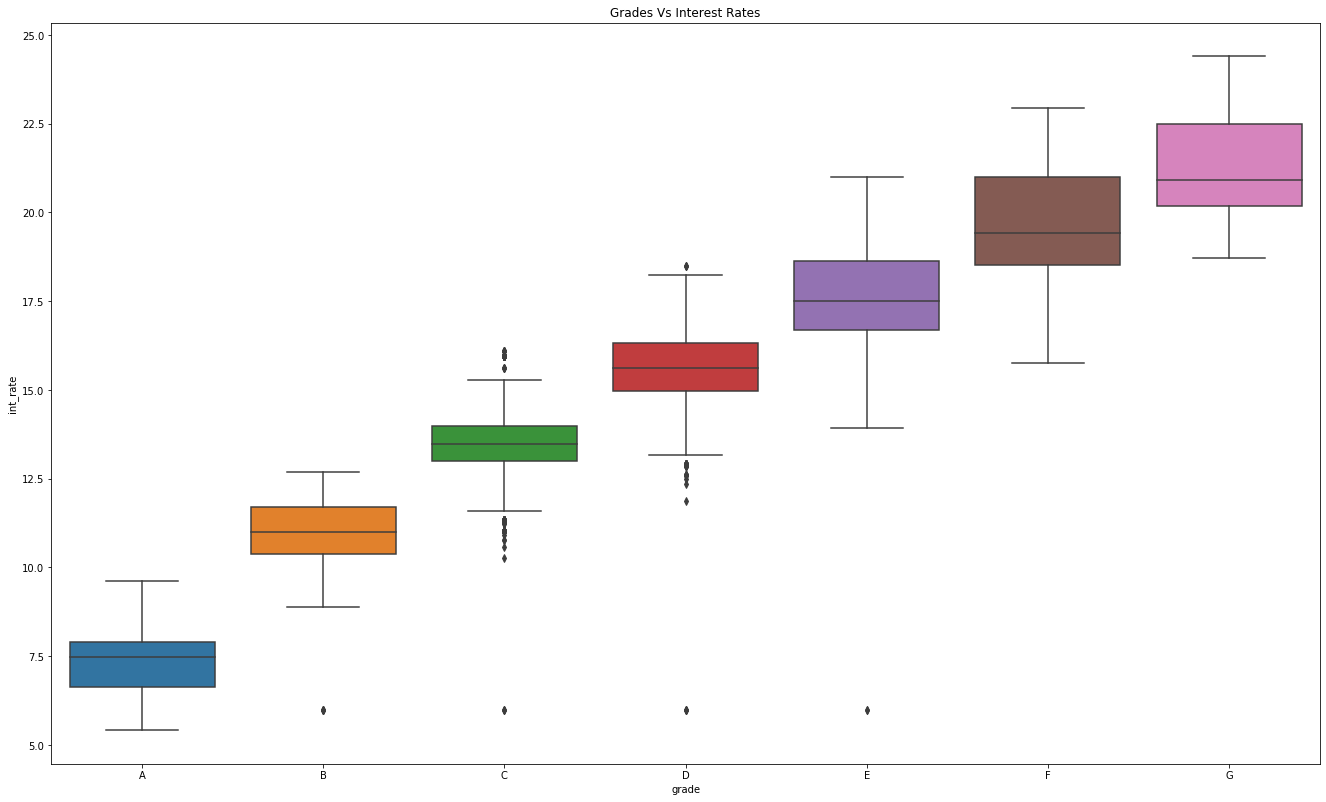

In [46]:
#BoxPlot on Grades and Interest rates
plt.figure(figsize = (50, 30))
plt.subplot(2, 2, 1)
plt.title('Grades Vs Interest Rates')
sns.boxplot(data=loanDF.sort_values(by=['grade']), x="grade", y="int_rate")
plt.show()

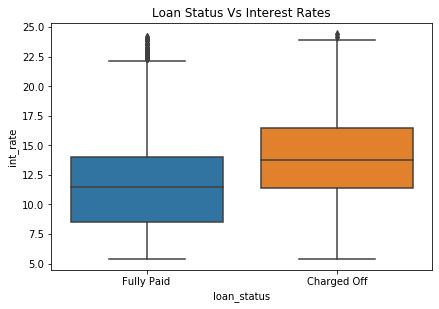

In [47]:
#BoxPlot on Loan Status Vs Interest Rates
plt.figure(figsize = (15, 10))
plt.subplot(2, 2, 1)
plt.title('Loan Status Vs Interest Rates')
sns.boxplot(data=loanDF, x="loan_status", y="int_rate")
plt.show()


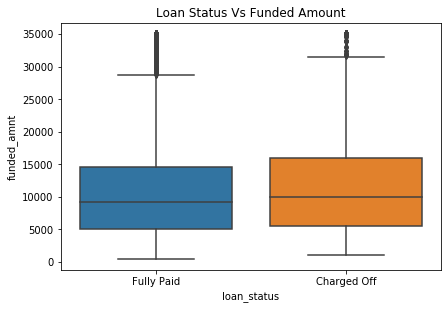

In [48]:
#BoxPlot on Loan Status Vs Funded Amount
plt.figure(figsize = (15, 10))
plt.subplot(2, 2, 1)
plt.title('Loan Status Vs Funded Amount')
sns.boxplot(data=loanDF, x="loan_status", y="funded_amnt")
plt.show()


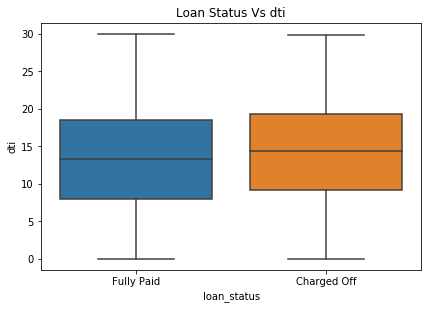

In [49]:
#BoxPlot on Loan Status Vs Debt to Income Ratio
plt.figure(figsize = (15, 10))
plt.subplot(2, 2, 1)
plt.title('Loan Status Vs dti')
sns.boxplot(data=loanDF, x="loan_status", y="dti")
plt.show()

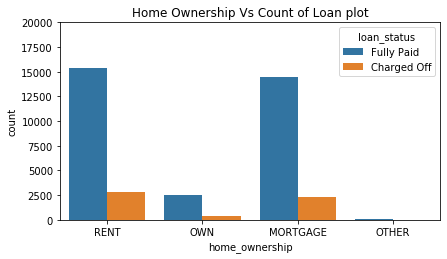

In [50]:
#Home Ownership Vs Count of Loan plot
plt.figure(figsize = (15, 8))
plt.subplot(2, 2, 1)
plt.ylim(0,20000)
plt.title('Home Ownership Vs Count of Loan plot')
ax = sns.countplot(x="home_ownership", hue="loan_status", data=loanDF)

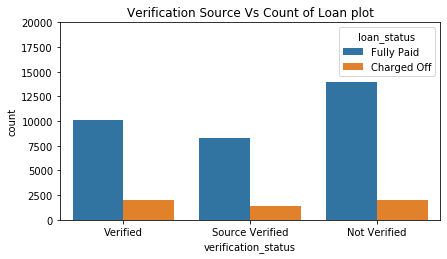

In [51]:
#Verification Source Vs Count of Loan plot
plt.figure(figsize = (15, 8))
plt.subplot(2, 2, 1)
plt.ylim(0,20000)
plt.title('Verification Source Vs Count of Loan plot')
ax = sns.countplot(x="verification_status", hue="loan_status", data=loanDF)

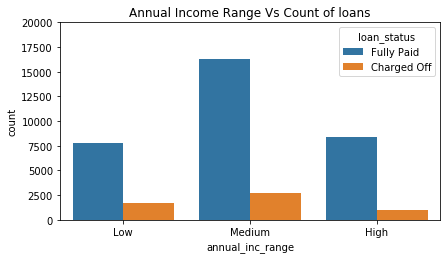

In [52]:
#Annual Income Range Vs Count of loans Plot
plt.figure(figsize = (15, 8))
plt.subplot(2, 2, 1)
plt.ylim(0,20000)
plt.title('Annual Income Range Vs Count of loans')
ax = sns.countplot(x="annual_inc_range", hue="loan_status", data=loanDF)

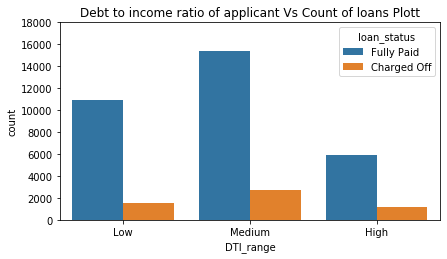

In [53]:
#Debt to income ratio of applicant Vs Count of loans Plot
plt.figure(figsize = (15, 8))
plt.subplot(2, 2, 1)
plt.ylim(0,18000)
plt.title('Debt to income ratio of applicant Vs Count of loans Plott')
sns.countplot(x="DTI_range", hue="loan_status", data=loanDF)
plt.show()

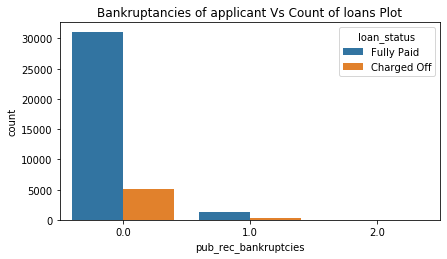

In [54]:
#Bankruptancies of applicant Vs Count of loans Plot
plt.figure(figsize = (15, 8))
plt.subplot(2, 2, 1)
plt.title('Bankruptancies of applicant Vs Count of loans Plot')
ax = sns.countplot(x="pub_rec_bankruptcies", hue="loan_status", data=loanDF)

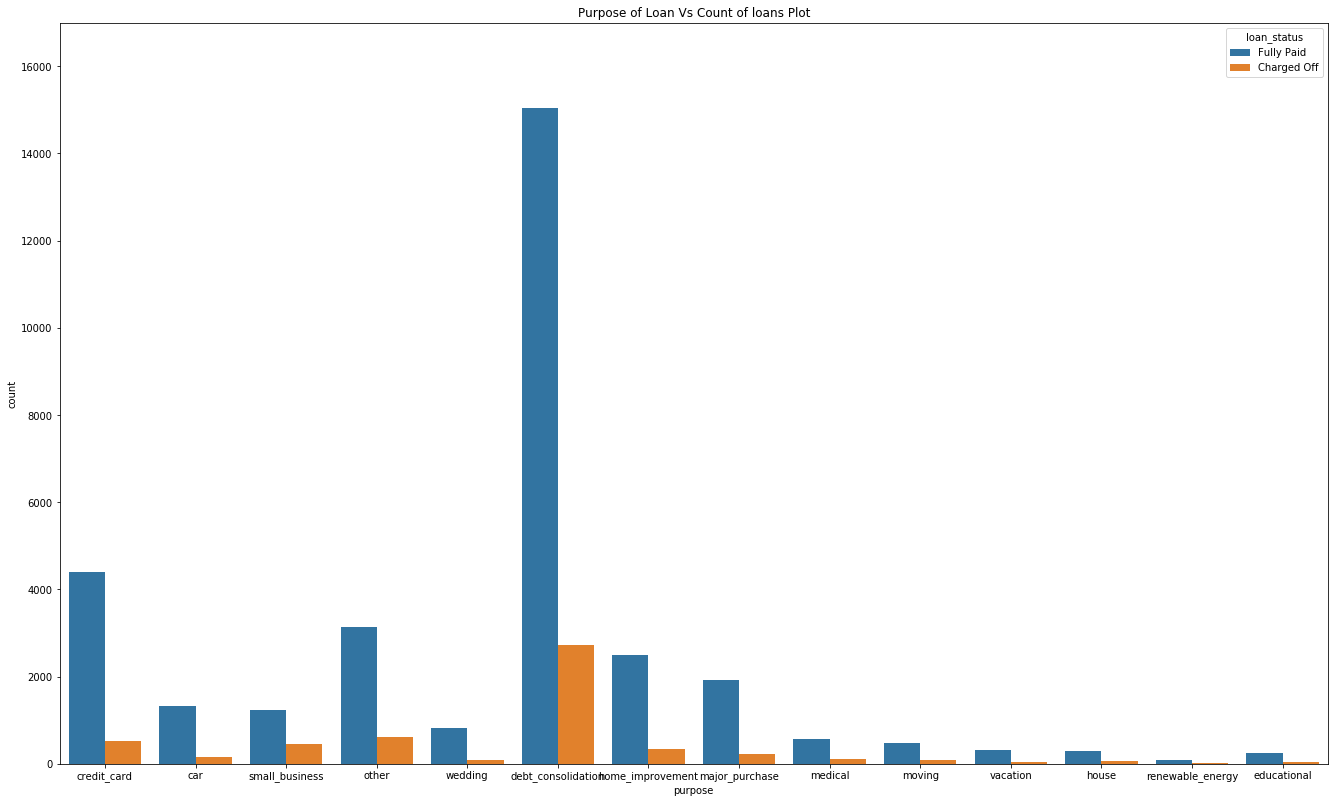

In [55]:
#Purpose of Loan Vs Count of loans Plot
plt.figure(figsize = (50, 30))
plt.subplot(2, 2, 1)
plt.ylim(0,17000)
plt.title('Purpose of Loan Vs Count of loans Plot')
ax = sns.countplot(x="purpose", hue="loan_status", data=loanDF)

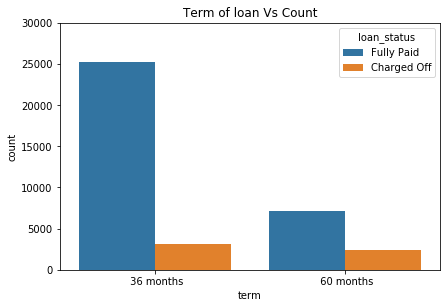

In [56]:
#Term of loan Vs Count Plot
plt.figure(figsize = (15, 10))
plt.subplot(2, 2, 1)
plt.ylim(0,30000)
plt.title('Term of loan Vs Count')
ax = sns.countplot(x="term", hue="loan_status", data=loanDF)

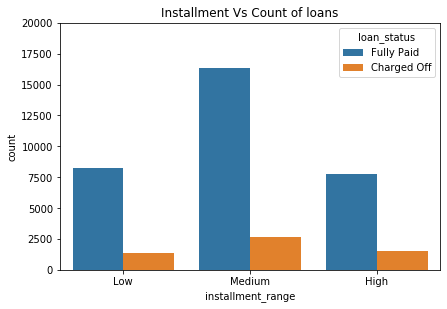

In [57]:
#Installment Vs Count of loans Plot
plt.figure(figsize = (15, 10))
plt.subplot(2, 2, 1)
plt.ylim(0,20000)
plt.title('Installment Vs Count of loans')
ax = sns.countplot(x="installment_range", hue="loan_status", data=loanDF)

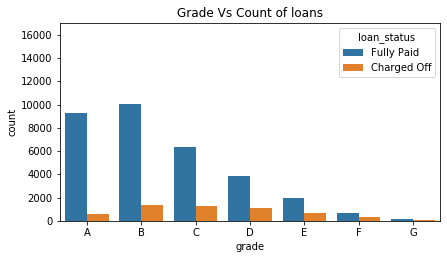

In [58]:
#Grade Vs Count of loans Plot
plt.figure(figsize = (15, 8))
plt.subplot(2, 2, 1)
plt.ylim(0,17000)
plt.title('Grade Vs Count of loans')
ax = sns.countplot(x="grade", hue="loan_status", data=loanDF.sort_values(by=['grade']))

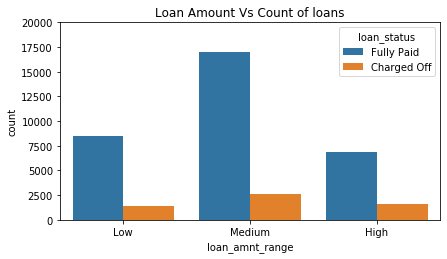

In [59]:
#Loan Amount Vs Count of loans Plot
plt.figure(figsize = (15, 8))
plt.subplot(2, 2, 1)
plt.ylim(0,20000)
plt.title('Loan Amount Vs Count of loans')
ax = sns.countplot(x="loan_amnt_range", hue="loan_status", data=loanDF)

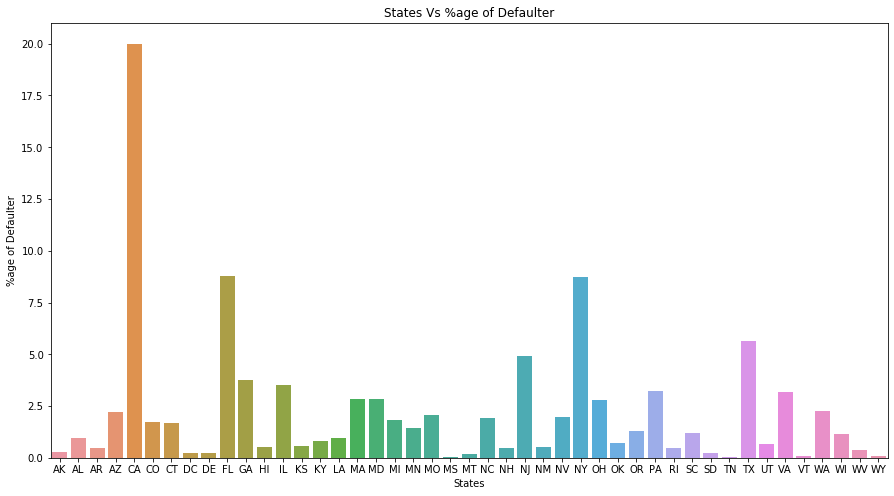

In [60]:
#Geographical States Vs %age of Defaulter
StateDF = loanDF[loanDF['loan_status']=='Charged Off'].groupby('addr_state')['loan_status'].count().reset_index()
StateDF['percent']=StateDF['loan_status'].apply(lambda x: (x/StateDF.loan_status.sum())*100)
plt.figure(figsize=(15,8))
sns.barplot(x='addr_state', y='percent', data=StateDF)
plt.xlabel('States')
plt.ylabel('%age of Defaulter')
plt.title('States Vs %age of Defaulter')
plt.show()

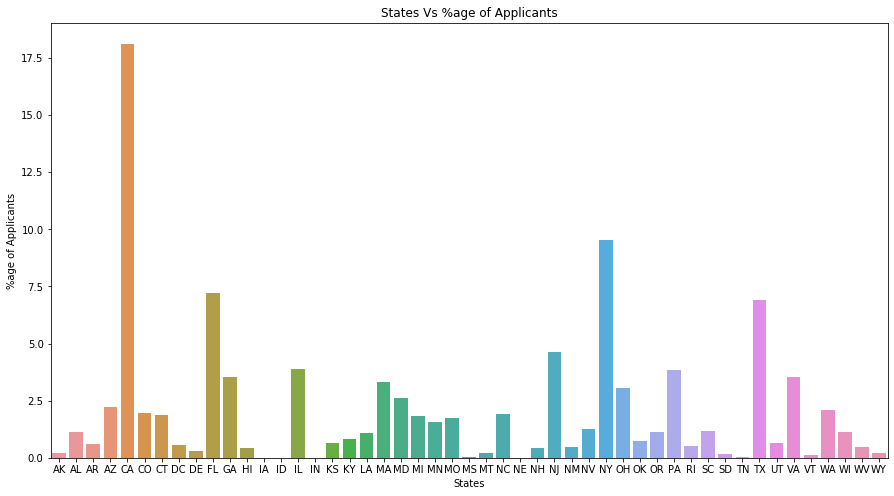

In [61]:
#Geographical States Vs %age of Applicants
StateDF = loanDF.groupby('addr_state')['loan_status'].count().reset_index()
StateDF['percent']=StateDF['loan_status'].apply(lambda x: (x/StateDF.loan_status.sum())*100)
plt.figure(figsize=(15,8))
sns.barplot(x='addr_state', y='percent', data=StateDF)
plt.xlabel('States')
plt.ylabel('%age of Applicants')
plt.title('States Vs %age of Applicants')
plt.show()

###### Observations/Inferences : 
Loan applicants taking loans for debt consolidation are highly likely to repay the loan. Small business loan applicants are most likely to default the loan

Geographical state CA has most number of applicants i.e. 17.5% and also the most number of defaulters.

Loan applicants of grade A has the least default ratio of loan.

Loans categorized under high loan amount are more likely to default to the loan.

Ratio of fully paid vs charged off is highest for medium income range loan applicants. Hence this group of people are more likely to repay the loan amount.

### Checkpoint
### Multivariate Analysis on Loan Dataset


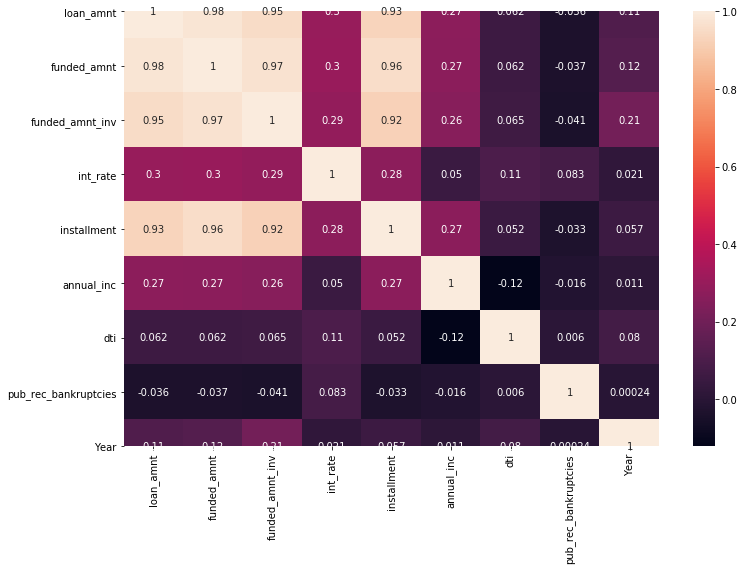

In [62]:
#Multivariate Analysis on Dataset
loanDF = loanDF.drop(['policy_code', 'acc_now_delinq','delinq_amnt','id','member_id'], axis = 1) 
plt.figure(figsize=(12, 8))
loan_corr = loanDF.corr()
sns.heatmap(loan_corr, 
            xticklabels = loan_corr.columns.values,
            yticklabels = loan_corr.columns.values,
            annot = True);

### Final Conclusion : 
#### With the above analysis, it can be said that:

1. Loans provided for a tenure of 36 months are most likely to get repaid.

2. Loan applicants belonging to grade A-C are most likely to repay the loan and those from lower grades like G would default on loan.

3. With increase rate of interest, the chances to dafault the loan increases. From the analysis, it can be concluded that the ROI incrsease with grades of people moving from A-G.

4. The percentage of loan applicants is maximum from state CA (17.5%), but the percentage of loan defaulters are also maxmimum from state CA (~20 %).

5. Loan applicants having experience of 10 years are most likely to repay the loan.

6. Loan applicants having high debt to income ratio are more likely to default the loan.

7. Loan applicants taking loans for debt consolidation are highly likely to repay the loan.
